In [4]:
# import planckStyle
import sys
import pylab
import numpy as np
import tkinter
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker

import fgivenx
from fgivenx import plot_contours, samples_from_getdist_chains


sys.path.append("/home/isidro/Documents/gitHub/simplemc_tests/")
from simplemc.plots.plot_Quintom_variables import *
from simplemc.models.QuintomCosmology import QuintomCosmology
from simplemc.models.LCDMCosmology import LCDMCosmology
from simplemc.cosmo.paramDefs import *

# matplotlib.use('TkAgg')
%matplotlib inline

Initalizing nu density look up table... Done
Hello, World! I am process 0 of 1 on ubik


/home/isidro/Documents/gitHub/simplemc_tests/simplemc/analyzers/GA_deap.py:14: UserWarning: Please install DEAP library if you want to use ga_deap genetic algorithms.
  warnings.warn("Please install DEAP library if you want to use ga_deap genetic algorithms.")
/home/isidro/Documents/gitHub/simplemc_tests/simplemc/analyzers/elitism.py:6: UserWarning: Please install DEAP library if you want to use ga_deap genetic algorithms.
  warnings.warn("Please install DEAP library if you want to use ga_deap genetic algorithms.")


In [5]:
dir_name = 'chains_quintom/'
cmap_reversed = matplotlib.cm.get_cmap('Greens_r')

In [6]:
steps = 9
coupling = 0
fname = 'Quintom_coupling_both'


if fname == 'Quintessence':
    T = QuintomCosmology(vary_mquin=True)
    name = fname
    mlabel = '$m_\phi$'

if fname == 'Phantom':
    T = QuintomCosmology(vary_mphan=True)
    name = fname
    mlabel = '$m_\psi$'

if fname == 'Quintom_mquin':
    T = QuintomCosmology(vary_mquin=True, vary_mphan=True)
    mphan = 1.2
    name = 'Quintom, $m_{\psi}$=%0.1f'%mphan
    mlabel = '$m_\phi$'

if fname == 'Quintom_mphan':
    T = QuintomCosmology(vary_mquin=False, vary_mphan=True)
    mphi = 1.2
    name = 'Quintom, $m_{\phi}$=%0.1f'%mphi
    mlabel = '$m_\psi$'

if fname == 'Quintom_coupling_mquin':
    T = QuintomCosmology(vary_mquin=True, vary_coupling=True)
    mphan = 1.2
    coupling = 4.0
    name = 'Quintom, $m_{\psi}$=%0.1f, $\\beta=%0.1f$'%(mphan, coupling)
    mlabel = '$m_\phi$'

if fname == 'Quintom_coupling_mphan':
    T = QuintomCosmology(vary_mphan=True, vary_coupling=True)
    mphi = 1.0 #1.2
    coupling = 10 #6.0
    name = 'Quintom, $m_{\phi}$=%0.1f, $\\beta=%0.1f$'%(mphi, coupling)
    mlabel = '$m_\psi$'

if fname == 'Quintom_coupling_both':
    T = QuintomCosmology(vary_mquin=True, vary_mphan=True, vary_coupling=True)
    mphi = 2.0
    mphan = 1.0
    coupling = -1
    name = 'Quintom, $m_{\phi}$=%0.1f, $m_{\psi}$=%0.1f'%(mphi, mphan)
    mlabel = '$\\beta$'

if fname == 'Quintom_coupling_both':
    min, max = (4., 8.)
else:
    min, max = (0.1, 2.5)
if coupling < 0:
    min, max = (-10, -1.)


In [7]:
step = (max-min)/steps

mquin_ = mquin_par
mphan_ = mphan_par
coupling_ = coupling_par
om_ = Om_par
obh2_ = Obh2_par
h_ = h_par

ww = []
zz = []
PP = []


for i in np.arange(min, max, step):
    if fname == 'Quintessence':
        mquin_.setValue(i)
        T.updateParams([mquin_])

    if fname == 'Phantom':
        mphan_.setValue(i)
        T.updateParams([mphan_])


    if fname == 'Quintom_mquin':
        mquin_.setValue(i)
        mphan_.setValue(mphan)
        T.updateParams([mquin_, mphan_])


    if fname == 'Quintom_mphan':
        mphan_.setValue(i)
        mquin_.setValue(mphi)
        T.updateParams([mquin_, mphan_])

    if fname == 'Quintom_coupling_mquin':
        mquin_.setValue(i)
        mphan_.setValue(mphan)
        coupling_.setValue(coupling)
        T.updateParams([mquin_, mphan_, coupling_])

    if fname == 'Quintom_coupling_mphan':
        mquin_.setValue(mphi)
        mphan_.setValue(i)
        coupling_.setValue(coupling)
        T.updateParams([mquin_, mphan_, coupling_])

    if fname == 'Quintom_coupling_both':
        mquin_.setValue(mphi)
        mphan_.setValue(mphan)
        coupling_.setValue(i)
        T.updateParams([mquin_, mphan_, coupling_])


    T.call_functions()
    zl = np.arange(0, 3, 0.05)
    ww.append([T.w_de(1./(1+z)) for z in zl])
    PP.append(i)
    zz.append(zl)


In [8]:
np.shape(ww), np.shape(ww), np.shape(zl)

((9, 60), (9, 60), (60,))

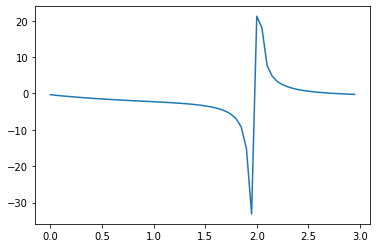

In [9]:
plt.plot(zz[7], np.array(ww[7]).reshape(60,))

Text(0.5, 0, 'z')

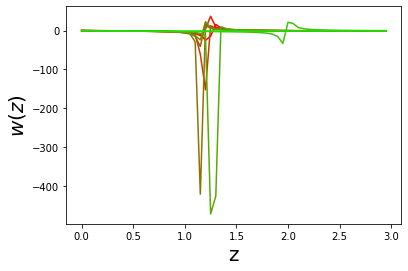

In [10]:
# -- Plot 1
for x, w, z in zip(zz, ww, PP):
    g = (float(z) - min)/(max - min)
    b, r = 0, 1 - g
    plt.plot(x, w, color=(r, g, b))

plt.ylabel('$w(z)$', fontsize=20)
plt.xlabel('z', fontsize=20)

In [11]:
def eos(z, params):
#     mphi, mphan, coupling = params
    om, obh2, h, mphi, mphan, coupling = params
    T = QuintomCosmology(vary_mquin=True, vary_mphan=True, vary_coupling=True)
    mquin_.setValue(mphi)
    mphan_.setValue(mphan)
    coupling_.setValue(coupling)
    om_.setValue(om)
    obh2_.setValue(obh2)
    h_.setValue(h)

    T.updateParams([om_, obh2_, h_, mquin_, mphan_, coupling_])
    T.call_functions()
    return T.w_de(1./(1+z))

chains_quintom/350/Quintom_couple_phy_CBAO_nested_multi_1.txt
Removed 0.5 as burn in


  0%|          | 0/920 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

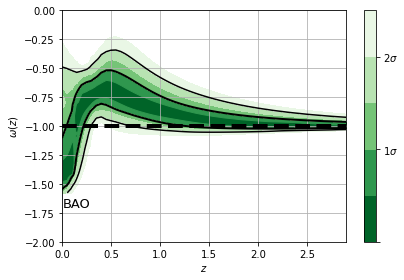

In [12]:
# file_root = dir_name + 'Quintom_couple_phy_SN+HD+CBAO_nested_multi'
file_root = dir_name + '350/Quintom_couple_phy_CBAO_nested_multi'

samples, weights = samples_from_getdist_chains(['Om', 'Obh2', 'h','mquin', 'mphan', 'beta'], file_root,
                                               settings={'ignore_rows':0.5})
# k = np.linspace(0,2,9)
k = np.arange(0, 3.1, 0.05)

cbar = plot_contours(eos, k, samples, weights=weights, colors=cmap_reversed, contour_line_levels=[1,2], 
                     linewidths=[2,1.5])
cbar = plt.colorbar(cbar,ticks=[0,1,2],  )
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])
plt.hlines(-1, xmin=0, xmax=3, colors='black',  linestyles='dashed', label='$w=-1$', lw=4)
# plt.ylabel(r'$H(z)/(1+z)[km\;s^{-1}Mpc^{-1}]$')
plt.ylabel(r'$\omega(z)$')
plt.xlabel(r'$z$')
plt.ylim(-2,0)
plt.xlim(0, 2.9)
plt.tight_layout()
plt.grid()

# plt.legend(loc='lower left')
plt.text(0.01,-1.7, 'BAO', fontsize=13)
plt.savefig('eos_quintom_couple_cbao_burn5.png', dpi=300)
plt.savefig('eos_quintom_couple_cbao_burn5.svg')

In [13]:
def hoverzfn(z, params):
    om, obh2, h, mphi, mphan, coupling = params
    T = QuintomCosmology(vary_mquin=True, vary_mphan=True, vary_coupling=True)
    mquin_.setValue(mphi)
    mphan_.setValue(mphan)
    coupling_.setValue(coupling)
    om_.setValue(om)
    obh2_.setValue(obh2)
    h_.setValue(h)

    T.updateParams([om_, obh2_, h_, mquin_, mphan_, coupling_])
#     mphi, mphan, coupling = params
#     T = QuintomCosmology(vary_mquin=True, vary_coupling=True)
#     mquin_.setValue(mphi)
#     mphan_.setValue(mphan)
#     coupling_.setValue(coupling)
#     T.updateParams([mquin_, mphan_, coupling_])
    T.call_functions()
    H = T.Hubble_a(1./(1+z))
    return H/(1+z)

chains_quintom/350/Quintom_couple_phy_SN+HD+CBAO_nested_multi_1.txt
Removed 0.5 as burn in


  0%|          | 0/765 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

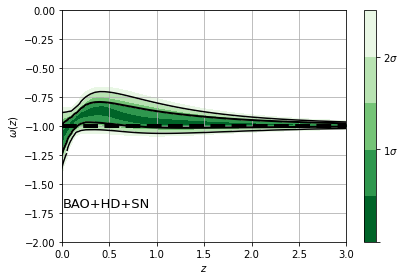

In [14]:
file_root = dir_name + '350/Quintom_couple_phy_SN+HD+CBAO_nested_multi'
# file_root = dir_name + 'Quintom_couple_phy_CBAO_nested_multi'

samples, weights = samples_from_getdist_chains(['Om', 'Obh2', 'h','mquin', 'mphan', 'beta'], file_root,
                                               settings={'ignore_rows':0.5})
# k = np.linspace(0,2,9)
k = np.arange(0, 3.1, 0.05)

cbar = plot_contours(eos, k, samples, weights=weights, colors=cmap_reversed, contour_line_levels=[1,2], 
                     linewidths=[2,1.5])
cbar = plt.colorbar(cbar,ticks=[0,1,2],  )
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])
plt.hlines(-1, xmin=0, xmax=3, colors='black',  linestyles='dashed', label='$w=-1$', lw=4)

# plt.ylabel(r'$H(z)/(1+z)[km\;s^{-1}Mpc^{-1}]$')
plt.ylabel(r'$\omega(z)$')
plt.xlabel(r'$z$')
plt.ylim(-2,0)
plt.xlim(0, 3)
plt.tight_layout()
plt.grid()

# plt.legend(loc='lower left')
# plt.text(0.01,-1.7, 'SN+HD+CBAO', fontsize=13)
plt.text(0.01,-1.7, 'BAO+HD+SN', fontsize=13)
plt.savefig('eos_quintom_couple_sn+hd+cbao_burn5.png', dpi=300)
plt.savefig('eos_quintom_couple_sn+hd+cbao_burn5.svg')


In [15]:
def hoverzfn_lcdm(z, om, obh2, h):
    T = LCDMCosmology()
    om_.setValue(om)
    obh2_.setValue(obh2)
    h_.setValue(h)
    T.updateParams([om_, obh2_, h_])
    h_list =[]
    for zz in z:
#       T.RHSquared_a = E(z) = H(z)^2/H(z=0)^2
        Ez = T.RHSquared_a(1./(1+zz))
        H = np.sqrt((100*h)**2*Ez)
        hinv = H/(1+zz)
        h_list.append(hinv)
           
    return np.array(h_list)


In [16]:
z = np.linspace(0, 3, 100)
rd_fid_DR12 = 147.78

zLyaA = 2.37
zLyaC = 2.35
zCombBAO1 = 0.38
zCombBAO2 = 0.51
zCombBAO3 = 0.61
fact = (300000./rd_fid_DR12)

def ersys(x, y):
    return np.sqrt(x**2 + y**2)

lcdmzh = hoverzfn_lcdm(z, h=0.68, obh2=0.0220, om=0.31)

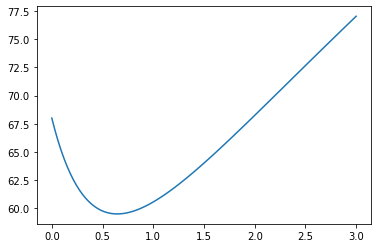

In [17]:
plt.plot(z, lcdmzh)
plt.show()

In [18]:
file_root = dir_name + '/350/Quintom_couple_phy_SN+HD+CBAO_nested_multi'
# file_root = dir_name + '/350/Quintom_couple_phy_CBAO_nested_multi'

samples, weights = samples_from_getdist_chains(['Om', 'Obh2', 'h','mquin', 'mphan', 'beta'], file_root, 
                                              settings={'ignore_rows':0.0})
# k = np.linspace(0,2.0,100)
k = np.arange(0,3.1, 0.05)

cbar = plot_contours(hoverzfn, k, samples, weights=weights, contour_line_levels=[1,2],  
                     colors=cmap_reversed, linewidths=[2,1.5] )
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

# plt.errorbar(0.02,  69.8,       yerr=0.8, color='green', fmt='o', markersize=5, elinewidth=1., capsize=5, capthick=2)
# plt.errorbar(0.38,  63.9,       yerr=1.0, color='green', fmt='d', markersize=5, elinewidth=1., capsize=5, capthick=2)
# plt.errorbar(0.51,  62.6,       yerr=1.0, color='green', fmt='d', markersize=5, elinewidth=1., capsize=5, capthick=2)
# plt.errorbar(0.61,  61.9,       yerr=1.0, color='green', fmt='d', markersize=5, elinewidth=1., capsize=5, capthick=2)
# plt.errorbar(2.34,  65.6,       yerr=3.3, color='green', fmt='s', markersize=5, elinewidth=1., capsize=5, capthick=2)
# plt.errorbar(2.36,  67.8,       yerr=3.4, color='green', fmt='s', markersize=5, elinewidth=1., capsize=5, capthick=2)

#https://arxiv.org/abs/1904.03430
plt.errorbar(zLyaC,  fact/9.20/(1+zLyaC),        yerr=0.36*fact/(1+zLyaC)/9.20**2,
              color='red', fmt='s', markersize=6, elinewidth=1.5)
#https://arxiv.org/abs/1904.03430
plt.errorbar(zLyaA,  fact/8.86/(1+zLyaA),        yerr=0.29*fact/(1+zLyaA)/8.86**2,
              color='red', fmt='s', markersize=6, elinewidth=1.5)

plt.errorbar(zCombBAO1,  81.21/(1+zCombBAO1),       yerr=ersys(2.17, 0.97)/(1+zCombBAO1),
              color='red', fmt='d', markersize=6, elinewidth=1.5)
plt.errorbar(zCombBAO2,  90.90/(1+zCombBAO2),       yerr=ersys(2.07, 1.08)/(1+zCombBAO1),
              color='red', fmt='d', markersize=6, elinewidth=1.5)
plt.errorbar(zCombBAO3,  98.96/(1+zCombBAO3),       yerr=ersys(2.21, 1.18)/(1+zCombBAO1),
              color='red', fmt='d', markersize=6, elinewidth=1.5)
plt.errorbar(0.01,  69.8,       yerr=0.8,
              color='red', fmt='d', markersize=6, elinewidth=1.5)


plt.plot(z, lcdmzh, color='black', label=r'$\Lambda CDM$', lw=4,  linestyle='dashed')

# plt.hlines(-1, xmin=0, xmax=2, colors='r',  linestyles='dashed', label='$w=-1$', lw=2)
plt.ylabel(r'$H(z)/(1+z)[km\;s^{-1}Mpc^{-1}]$')
# plt.ylabel(r'$\omega(z)$')
plt.xlabel(r'$z$')
plt.xlim(0,3)
plt.ylim(45,80)
plt.tight_layout()
pylab.grid(True)


plt.legend(loc='lower left')
plt.text(0.01,76, 'BAO+HD+SN', fontsize=13)
plt.savefig('hzfn_quintom_couple_sn+hd+cbao.png', dpi=300)
plt.savefig('hzfn_quintom_couple_sn+hd+cbao.svg')
# plt.text(0.01,76, 'CBAO', fontsize=13)
# plt.savefig('hzfn_quintom_couple_cbao.png', dpi=300)
# plt.savefig('hzfn_quintom_couple_cbao.svg')

chains_quintom//350/Quintom_couple_phy_SN+HD+CBAO_nested_multi_1.txt
Removed no burn in


  0%|          | 0/1407 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# file_root = dir_name + '/350/Quintom_couple_phy_SN+HD+CBAO_nested_multi'
file_root = dir_name + '/350/Quintom_couple_phy_CBAO_nested_multi'

samples, weights = samples_from_getdist_chains(['Om', 'Obh2', 'h','mquin', 'mphan', 'beta'], file_root, 
                                              settings={'ignore_rows':0.0})
# k = np.linspace(0,2.0,100)
k = np.arange(0,3.1, 0.05)

cbar = plot_contours(hoverzfn, k, samples, weights=weights, contour_line_levels=[1,2],  
                     colors=cmap_reversed, linewidths=[2,1.5] )
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

#https://arxiv.org/abs/1904.03430
plt.errorbar(zLyaC,  fact/9.20/(1+zLyaC),        yerr=0.36*fact/(1+zLyaC)/9.20**2,
              color='red', fmt='s', markersize=6, elinewidth=1.5)
#https://arxiv.org/abs/1904.03430
plt.errorbar(zLyaA,  fact/8.86/(1+zLyaA),        yerr=0.29*fact/(1+zLyaA)/8.86**2,
              color='red', fmt='s', markersize=6, elinewidth=1.5)

plt.errorbar(zCombBAO1,  81.21/(1+zCombBAO1),       yerr=ersys(2.17, 0.97)/(1+zCombBAO1),
              color='red', fmt='d', markersize=6, elinewidth=1.5)
plt.errorbar(zCombBAO2,  90.90/(1+zCombBAO2),       yerr=ersys(2.07, 1.08)/(1+zCombBAO1),
              color='red', fmt='d', markersize=6, elinewidth=1.5)
plt.errorbar(zCombBAO3,  98.96/(1+zCombBAO3),       yerr=ersys(2.21, 1.18)/(1+zCombBAO1),
              color='red', fmt='d', markersize=6, elinewidth=1.5)
plt.errorbar(0.01,  69.8,       yerr=0.8,
              color='red', fmt='d', markersize=6, elinewidth=1.5)

# plt.errorbar(0.02,  69.8,       yerr=0.8, color='green', fmt='o', markersize=5, elinewidth=1., capsize=5, capthick=2)
# plt.errorbar(0.38,  63.9,       yerr=1.0, color='green', fmt='d', markersize=5, elinewidth=1., capsize=5, capthick=2)
# plt.errorbar(0.51,  62.6,       yerr=1.0, color='green', fmt='d', markersize=5, elinewidth=1., capsize=5, capthick=2)
# plt.errorbar(0.61,  61.9,       yerr=1.0, color='green', fmt='d', markersize=5, elinewidth=1., capsize=5, capthick=2)
# plt.errorbar(2.34,  65.6,       yerr=3.3, color='green', fmt='s', markersize=5, elinewidth=1., capsize=5, capthick=2)
# plt.errorbar(2.36,  67.8,       yerr=3.4, color='green', fmt='s', markersize=5, elinewidth=1., capsize=5, capthick=2)


plt.plot(z, lcdmzh, color='black', label=r'$\Lambda CDM$', lw=4,  linestyle='dashed')

# plt.hlines(-1, xmin=0, xmax=2, colors='r',  linestyles='dashed', label='$w=-1$', lw=2)
plt.ylabel(r'$H(z)/(1+z)[km\;s^{-1}Mpc^{-1}]$')
# plt.ylabel(r'$\omega(z)$')
plt.xlabel(r'$z$')
plt.xlim(0,3)
plt.ylim(45,80)
plt.tight_layout()
pylab.grid(True)


plt.legend(loc='lower left')
# plt.text(0.01,76, 'SN+HD+CBAO', fontsize=13)
# plt.savefig('hzfn_quintom_couple_sn+hd+cbao.png', dpi=300)
# plt.savefig('hzfn_quintom_couple_sn+hd+cbao.svg')
plt.text(0.01,76, 'BAO', fontsize=13)
plt.savefig('hzfn_quintom_couple_cbao.png', dpi=300)
plt.savefig('hzfn_quintom_couple_cbao.svg')

In [ ]:
def hfn(z, params):
    om, obh2, h, mphi, mphan, coupling = params
    T = QuintomCosmology(vary_mquin=True, vary_mphan=True, vary_coupling=True)
    mquin_.setValue(mphi)
    mphan_.setValue(mphan)
    coupling_.setValue(coupling)
    om_.setValue(om)
    obh2_.setValue(obh2)
    h_.setValue(h)

    T.updateParams([om_, obh2_, h_, mquin_, mphan_, coupling_])

    T.call_functions()
    H = T.Hubble_a(1./(1+z))
    return H

In [ ]:
file_root = dir_name + '/350/Quintom_couple_phy_SN+HD+CBAO_nested_multi'
# file_root = dir_name + '/350/Quintom_couple_phy_CBAO_nested_multi'

samples, weights = samples_from_getdist_chains(['Om', 'Obh2', 'h','mquin', 'mphan', 'beta'], file_root)
# k = np.linspace(0,2.0,100)
k = np.arange(0, 2.5, 0.05)

cbar = plot_contours(hfn, k, samples, weights=weights, colors=cmap_reversed, linewidths=[2,1.5,1],
                    contour_line_levels=[1,2])
cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

# plt.hlines(-1, xmin=0, xmax=2, colors='r',  linestyles='dashed', label='$w=-1$', lw=2)
plt.ylabel(r'$H(z)[km\;s^{-1}Mpc^{-1}]$')
# plt.ylabel(r'$\omega(z)$')
plt.xlabel(r'$z$')
# plt.ylim(60,)
plt.tight_layout()
pylab.grid(True)

plt.text(0.01,250, 'SN+HD+CBAO', fontsize=13)
plt.savefig('hfn_quintom_couple_sn+hd+cbao.png', dpi=300)
plt.savefig('hfn_quintom_couple_sn+hd+cbao.svg')
# plt.text(0.01,250, 'CBAO', fontsize=13)
# plt.savefig('hfn_quintom_couple_cbao.png', dpi=300)
# plt.savefig('hfn_quintom_couple_cbao.svg')

In [ ]:
#Planck best fit cosmology
T2 = LCDMCosmology()
x1 = [67.4*np.sqrt(T2.RHSquared_a(1./(1+z))) for z in zl]
x2 = [T2.HIOverrd(z)*z/fixer(z) for z in zl]
x3 = [T2.DaOverrd(z)/fixer(z) for z in zl]
#PLK-15
#T=LCDMCosmology(Obh2=0.02225,Om=0.3156,h=0.6727)



params1 = {'backend': 'pdf',
               'axes.labelsize': 18,
               'xtick.labelsize': 18,
               'ytick.labelsize': 18,
               'legend.fontsize': 16,
               'lines.markersize': 6,
               'font.size': 20,
               'text.usetex': True}
pylab.rcParams.update(params1)


## --- Plotting --
fig, (ax2, ax3, ax4)= plt.subplots(3, sharex=True, gridspec_kw={'hspace': 0}, figsize=(7,10))
fig.suptitle(name, fontsize=17,  y=0.95)




## -- Plot 2
ax2.plot(zl, x1 , color='k', linestyle='--')
ax2.set_ylabel('$H(z)$', fontsize=20)



## -- Plot 3
ax3.plot(zl, x2 , color='k', linestyle='--')
ax3.set_ylabel("${\\rm zD_H(z)}/r_d\\sqrt{z}$")


## -- Plot 4
ax4.plot(zl, x3, color='k', linestyle='--')
ax4.set_xlim(0.05, 3)
ax4.set_ylabel("${\\rm D_M(z)}/r_d\\sqrt{z}$")





#Axis
ax4.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax4.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
#ax4.xaxis.set_minor_formatter(plt.ScalarFormatter())
#ax4.xaxis.set_major_locator(plt.FixedLocator([0.1,1.0]))
#ax4.xaxis.set_minor_locator(plt.FixedLocator([0.2,0.5,2]))
ax4.set_xlabel("$z$")


#pylab.savefig("Fig1_"+fname+".pdf", bbox_inches='tight')
pylab.show()



In [ ]:
z = np.linspace(0, 3, 100)
rd_fid_DR12 = 147.78

zLyaA = 2.37
zLyaC = 2.35
zCombBAO1 = 0.38
zCombBAO2 = 0.51
zCombBAO3 = 0.61
fact = (300000./rd_fid_DR12)

def ersys(x, y):
    return np.sqrt(x**2 + y**2)

#https://arxiv.org/abs/1904.03430
plt.errorbar(zLyaC,  fact/9.20/(1+zLyaC),        yerr=0.36*fact/(1+zLyaC)/9.20**2,
              color='red', fmt='s', markersize=6, elinewidth=1.5)
#https://arxiv.org/abs/1904.03430
plt.errorbar(zLyaA,  fact/8.86/(1+zLyaA),        yerr=0.29*fact/(1+zLyaA)/8.86**2,
              color='red', fmt='s', markersize=6, elinewidth=1.5)

plt.errorbar(zCombBAO1,  81.21/(1+zCombBAO1),       yerr=ersys(2.17, 0.97)/(1+zCombBAO1),
              color='red', fmt='d', markersize=6, elinewidth=1.5)
plt.errorbar(zCombBAO2,  90.90/(1+zCombBAO2),       yerr=ersys(2.07, 1.08)/(1+zCombBAO1),
              color='red', fmt='d', markersize=6, elinewidth=1.5)
plt.errorbar(zCombBAO3,  98.96/(1+zCombBAO3),       yerr=ersys(2.21, 1.18)/(1+zCombBAO1),
              color='red', fmt='d', markersize=6, elinewidth=1.5)
plt.errorbar(0.01,  69.8,       yerr=0.8,
              color='red', fmt='d', markersize=6, elinewidth=1.5)

# plt.plot(z, [100*0.682*(0.30*(1+zi)**3 + (1-0.30))**0.5/(1+zi) for zi in z], 'red', lw=1.5)
#plt.ylim(55, 80)
plt.ylim(50, 85)
plt.plot(z, lcdmzh)
plt.tight_layout()
plt.show()